Kharif-Season: 
Encoder-Decoder Model: [[41714.633]]


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Stacked LSTM: [[47303.277]]


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Bi-Directional LSTM: [[43084.36]]


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ConvLSTM: [[54294.434]]


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


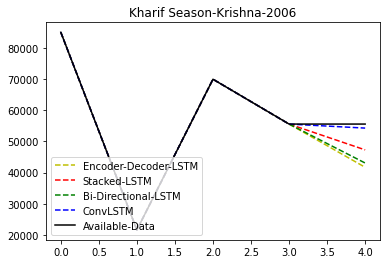

/usr/local/lib/python3.8/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


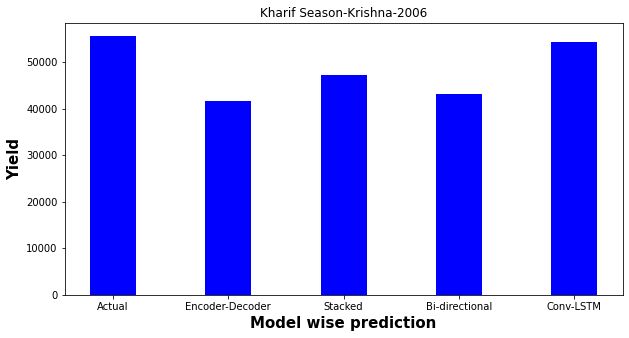

Accuracy: 
Encoder-Decoder: [[75.04387]]
Stacked: [[85.09773]]
Bi-directional: [[77.50798]]
Conv-LSTM: [[97.6747]]


-----------------------------------
Final average Accuracy: 
Encoder-Decoder: [[75.04387]]
Stacked: [[85.09773]]
Bi-directional: [[77.50798]]
Conv-LSTM: [[97.6747]]


In [ ]:
from numpy import array
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
from keras.layers import Bidirectional
from matplotlib import pyplot as pt
import numpy as np

result=[0]*4
acc=[0]*5

model = Sequential()
model1 = Sequential()
model2 = Sequential()
model3 = Sequential()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

def create_model1(n_steps,n_features):

    model1.add(LSTM(100, activation='sigmoid', input_shape=(n_steps, n_features)))
    model1.add(Dense(1))
    model1.compile(optimizer='adam', loss='mse')

def create_model2(n_steps,n_features):
    model2.add(LSTM(100, activation='sigmoid', return_sequences=True, input_shape=(n_steps, n_features)))
    model2.add(LSTM(100, activation='sigmoid'))
    model2.add(Dense(1))
    model2.compile(optimizer='adam', loss='mse')

def create_model3(n_steps,n_features):
    model3.add(Bidirectional(LSTM(100, activation='sigmoid'), input_shape=(n_steps, n_features)))
    model3.add(Dense(1))
    model3.compile(optimizer='adam', loss='mse')

def create_model4(n_steps,n_features,n_seq):
    model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='sigmoid', input_shape=(n_seq, 1, n_steps, n_features)))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

def process(rw):
    L=[]
    for i in rw:
       L.append(i)
    raw_seq=array(L,dtype=object)

    raw_seq=raw_seq.reshape((-1,1))
    A1 = MinMaxScaler(feature_range = (0,1))
    raw_seq=A1.fit_transform(raw_seq)


    # choose a number of time steps
    n_steps = 3
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    # summarize the data
    # choose a number of time steps
    n_steps = 3
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)

    #reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))

    try:
        # fit model
        model1.fit(X, y, epochs=600, verbose=0)
    except:
        create_model1(n_steps,n_features)
        model1.fit(X, y, epochs=600, verbose=0)
    x_input = array(raw_seq[-3:])
    # print(x_input)
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model1.predict(x_input, verbose=0)
    print("Encoder-Decoder Model: ",end='')

    yhat=yhat.reshape(-1, 1)
    output = A1.inverse_transform(yhat)
    print(output)
    result[0]=output
    Res.append(result[0])
    pt.plot(Res[-5:],'y--')
    Res.pop()

    #Stacked LSTM
    try:
        model2.fit(X, y, epochs=600, verbose=0)
    except:
        create_model2(n_steps,n_features)
        model2.fit(X, y, epochs=600, verbose=0)
    x_input = array(raw_seq[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat2 = model2.predict(x_input, verbose=0)
    print("Stacked LSTM: ",end='')
    # print(yhat2)
    yhat2=yhat2.reshape(-1, 1)
    output = A1.inverse_transform(yhat2)
    print(output)
    result[1]=output
    Res.append(result[1])
    pt.plot(Res[-5:],'r--')
    Res.pop()
    # fit model


    try:
        # fit model
        model3.fit(X, y, epochs=600, verbose=0)
    except:
        create_model3(n_steps,n_features)
        model3.fit(X, y, epochs=600, verbose=0)
    x_input = array(raw_seq[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat2 = model3.predict(x_input, verbose=0)
    print("Bi-Directional LSTM: ",end='')
    # print(yhat2)
    yhat2=yhat2.reshape(-1, 1)
    output = A1.inverse_transform(yhat2)
    print(output)
    result[2]=output
    Res.append(result[2])
    pt.plot(Res[-5:],'g--')
    Res.pop()

    # choose a number of time steps
    n_steps = 4

    # split into samples
    X, y = split_sequence(raw_seq, n_steps)

    # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
    n_features = 1
    n_seq = 2
    n_steps = 2
    X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))


    # define model
    try:
        model.fit(X, y, epochs=600, verbose=0)
    except:
        create_model4(n_steps,n_features,n_seq)
        model.fit(X, y, epochs=600, verbose=0)
    x_input = array(raw_seq[-4:])
    x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print("ConvLSTM: ",end='')
    # print(yhat)
    yhat=yhat.reshape(-1, 1)
    output = A1.inverse_transform(yhat)
    print(output)
    result[3]=output
    Res.append(result[3])
    pt.plot(Res[-5:],'b--')
    Res.pop()

def plotting(Val,num,yr):
    # barWidth = 0.25
    # ,'','','',''
    data = {'Actual':num, 'Encoder-Decoder':Val[0], 'Stacked':Val[1],
        'Bi-directional':Val[2], 'Conv-LSTM':Val[3]}
    mods = list(data.keys())
    values = list(data.values())

    fig = pt.figure(figsize = (10, 5))

    # creating the bar plot
    pt.bar(mods, values, color ='blue',
            width = 0.4)

    pt.xlabel("Model wise prediction", fontweight ='bold', fontsize = 15)
    pt.ylabel('Yield', fontweight ='bold', fontsize = 15)
    pt.title('Kharif Season-Krishna-2006')
    pt.show()

    print("Accuracy: ")

    print("Encoder-Decoder: " + str(100-(abs((num-Val[0])/num))*100))
    acc[0]+=(100-(abs((num-Val[0])/num))*100)
    print("Stacked: " + str(100-(abs((num-Val[1])/num)*100)))
    acc[1]+=(100-(abs((num-Val[1])/num)*100))
    print("Bi-directional: " + str(100-(abs((num-Val[2])/num))*100))
    acc[2]+=(100-(abs((num-Val[2])/num))*100)
    print("Conv-LSTM: " + str(100-(abs((num-Val[3])/num))*100))
    acc[3]+=(100-(abs((num-Val[3])/num))*100)
    acc[4]+=1
    print("")
    # fig = pt.figure(figsize =(6, 8))
    # v1=[]
    # v1.append(num)
    # v1.extend(Val)
    # lb=['Expected','Encoder-Decoder','Stacked','Bi-directional','Conv-LSTM']
    # # fig = pt.figure(figsize =(10, 7))
    # pt.bar(lb)
    # pt.bar(Val)

    # pt.xlabel('Person ' + str(i) +"'s expected income of "+ str(yr) , fontweight ='bold', fontsize = 15)
    # pt.ylabel('Salary in Rupees', fontweight ='bold', fontsize = 15)

    # pt.legend()
    # pt.show()

def accuracy():
    print("-----------------------------------\nFinal average Accuracy: ")

    print("Encoder-Decoder: " + str(acc[0]/acc[4]))

    print("Stacked: " + str(acc[1]/acc[4]))

    print("Bi-directional: " + str(acc[2]/acc[4]))

    print("Conv-LSTM: " + str(acc[3]/acc[4]))


path='/content/Krishna.csv'
# define input sequence
data = pd.read_csv(path)
a=data['Production_Kharif']
b=data['Production_Rabi']
Yer=data['Year']
Yer=Yer.tolist()
yr=Yer[-1]

A=a
A=A.tolist()
Res=A
res=A[-1]

print("Kharif-Season: ")
process(A[:-1])
A.append(res)
pt.plot(A[-5:],'k')
# pt.plot(A[-6:],'k')
pt.legend(["Encoder-Decoder-LSTM", "Stacked-LSTM", "Bi-Directional-LSTM","ConvLSTM","Available-Data"], loc ="lower left")
pt.title("Kharif Season-Krishna-2006")
# pt.xticks([2016,2017,2018,2019,2020,2021,2022])
pt.show()
plotting(result,res,yr)
print("")
accuracy()